# Deutsch--Josza Algorithm

## balanced oracle : f(x) = x₁ XOR x₂

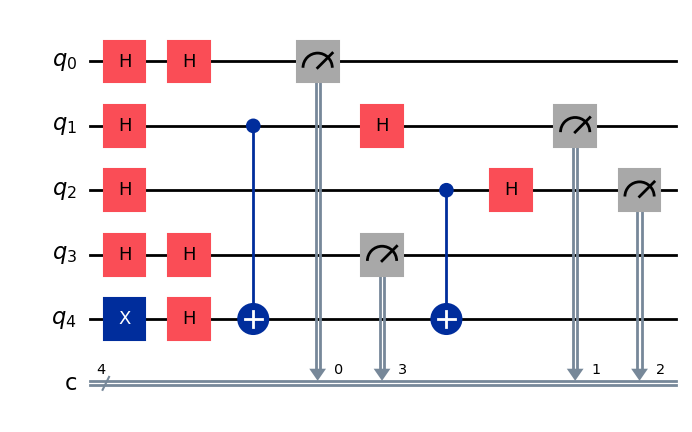

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


n = 4


qc = QuantumCircuit(n + 1, n)    #  Create circuit with n input + 1 ancilla qubit and n classical bits

qc.x(n)
qc.h(n)


for i in range(n):
    qc.h(i)          #  Apply Hadamard to all input qubits

def oracle(qc , n):   # Step 5: Balanced Oracle: f(x) = x₁ XOR x₂
    qc.cx(1, n)
    qc.cx(2, n)        # Flip ancilla if qubit 1 or qubit 2 is 1

oracle(qc ,n)

for i in range(n):         #  Apply Hadamard again to input qubits
    qc.h(i)


qc.measure(range(n), range(n))

qc.draw(output='mpl')




#### Simulation

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result=simulator.run(compiled_circuit, shots=4096).result()
counts = result.get_counts()
print("Measurement Results:", counts)


Measurement Results: {'0110': 4096}
